<a href="https://colab.research.google.com/github/Dohun-Im/Machine_Learning/blob/master/BasketBall_Pos_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('./basketball_stat.csv')
df_train=pd.read_csv('./basket_train.csv')
df_test=pd.read_csv('./basketball_test.csv')

In [ ]:
print('data 정보 \n')
print(df.info())

data 정보 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB
None


In [ ]:
print('Player 값 분포: \n', df['Player'].value_counts())
print('\n 2P 값 분포: \n', df['2P'].value_counts())
print('\n STL 값 분포: \n', df['STL'].value_counts())

Player 값 분포: 
 Alex Abrines      1
Ian Mahinmi       1
Victor Oladipo    1
Jamal Murray      1
Timofey Mozgov    1
                 ..
Marc Gasol        1
Channing Frye     1
Evan Fournier     1
Joel Embiid       1
Lou Williams      1
Name: Player, Length: 100, dtype: int64

 2P 값 분포: 
 2.2    8
2.9    4
2.7    4
3.4    4
1.3    4
1.4    3
1.9    3
2.1    3
3.6    3
1.7    3
4.3    3
0.5    2
2.5    2
4.8    2
5.1    2
4.7    2
3.9    2
4.1    2
1.2    2
0.7    2
5.9    2
4.4    2
2.3    2
2.8    2
5.6    2
6.2    2
3.0    2
1.6    1
2.4    1
8.5    1
5.0    1
4.9    1
3.1    1
6.1    1
7.0    1
1.5    1
6.3    1
2.0    1
0.6    1
1.1    1
5.2    1
3.7    1
0.9    1
5.8    1
5.3    1
9.7    1
7.2    1
4.6    1
1.8    1
5.4    1
3.5    1
0.8    1
3.3    1
Name: 2P, dtype: int64

 STL 값 분포: 
 0.5    17
0.6    13
0.7    10
0.9    10
1.1     8
0.8     7
0.3     7
1.0     5
1.2     5
0.4     5
0.2     3
1.5     2
1.4     2
1.3     2
0.0     2
0.1     1
1.6     1
Name: STL, dtype: int64


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'STL - 2P')

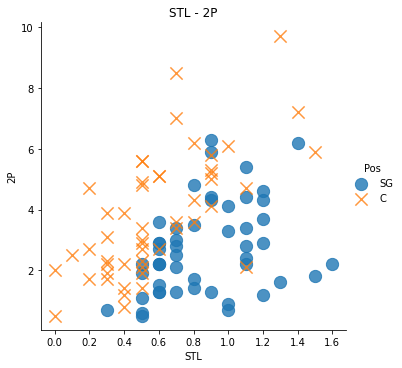

In [ ]:
# 스틸, 2점슛 데이터 시각화
sns.lmplot('STL','2P', data=df, fit_reg= False,
          scatter_kws={"s":150},
          markers=['o','x'],
          hue='Pos')

plt.title('STL - 2P')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '3P - BLK')

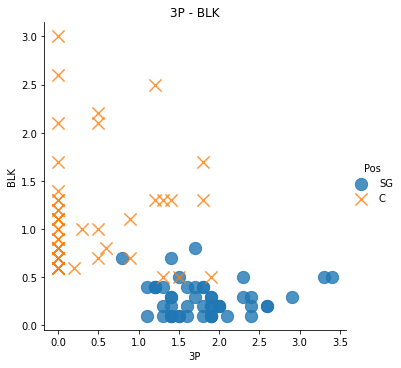

In [ ]:
sns.lmplot('3P','BLK', data=df, fit_reg= False,
          scatter_kws={"s":150},
          markers=['o','x'],
          hue='Pos')

plt.title('3P - BLK') 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'TRB - 3P')

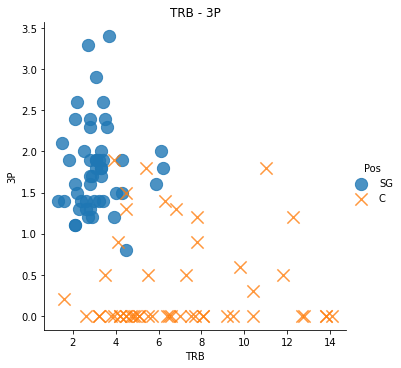

In [ ]:
sns.lmplot('TRB','3P', data=df, fit_reg= False,
          scatter_kws={"s":150},
          markers=['o','x'],
          hue='Pos')

plt.title('TRB - 3P') 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'TRB - 3P')

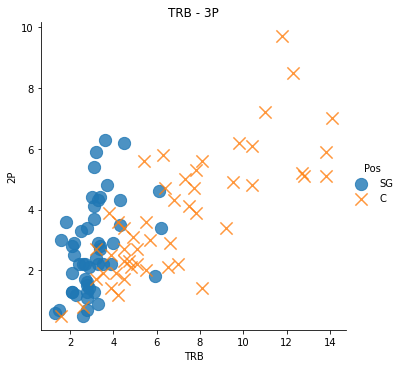

In [ ]:
sns.lmplot('TRB','2P', data=df, fit_reg= False,
          scatter_kws={"s":150},
          markers=['o','x'],
          hue='Pos')

plt.title('TRB - 3P') 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import numpy as np

In [ ]:
def svc_param_selection(X, y, nfolds):
    svm_parameters = [
                        {'kernel': ['rbf'],
                         'gamma': [0.00001,0.0001, 0.001, 0.01, 0.1, 1],
                         'C': [0.01, 0.1, 1, 10, 100, 1000]
                        }
                       ]
    
    clf = GridSearchCV(SVC(), svm_parameters, cv=5)
    clf.fit(X_train, y_train.values.ravel())
    print(clf.best_params_)
    
    return clf

In [ ]:
X_train = df_train[['3P', 'BLK']]
y_train = df_train[['Pos']]
# 최적의 파라미터를 sklearn의 gridsearch를 통해 구합니다.
clf = svc_param_selection(X_train, y_train.values.ravel(), 10)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
# 테스트에 사용될 특징을 지정합니다
X_test = df_test[['3P', 'BLK']]

# 특징으로 예측할 값 (농구선수 포지션)을 지정합니다
y_test = df_test[['Pos']]

# 최적의 파라미터로 완성된 SVM에 테스트 데이터를 주입하여, 실제값과 예측값을 얻습니다.
y_true, y_pred = y_test, clf.predict(X_test)

print(classification_report(y_true, y_pred))
print()
print("accuracy : "+ str(accuracy_score(y_true, y_pred)) )

              precision    recall  f1-score   support

           C       1.00      1.00      1.00        11
          SG       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


accuracy : 1.0


In [ ]:
# 실제값(ground truth)과 예측값(prediction)이 어느 정도 일치하는 눈으로 직접 비교해봅니다
comparison = pd.DataFrame({'prediction':y_pred, 'ground_truth':y_true.values.ravel()}) 
comparison

,prediction,ground_truth
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,C,C
